https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/

In [160]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
import numpy as np


In [171]:
def rolldice(dicenum, dicetype):
    roll = 0
    for i in range(dicenum):
        roll = roll + random.randint(1,dicetype)
    return roll

In [175]:
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

In [215]:
class Fighter(object):

    def __init__(self, name, ):
        """Return a Fighter object whose name is *name*"""
        self.name = name
    def equip(self, weapon):
        """Equip a Weapon."""
        if weapon == '2h sword':
            self.weapon = weapon
            self.dicenum = 2
            self.dicetype = 6
        elif weapon == '2h axe':
            self.weapon = weapon
            self.dicenum = 1
            self.dicetype = 12
        else:
            raise RuntimeError('That type of weapon is not available.')
        return self.weapon + " equipped"

    def GreatWeaponMaster(self):
        """Enables Great Weapon Master."""
        self.GreatWeaponMaster = True
        return 'enabled'
    def GreatWeaponFighter(self):
        """Enables the Fighting Style, Great Weapon Fighter"""
        self.GreatWeaponFighter = True
    def attack(self,enemyAC):
        hitroll = rolldice(1,20)
        if hitroll >= enemyAC:
            damage = 0
            for i in range(self.dicenum):
                roll = random.randint(1,self.dicetype)
                
                #Great Weapon Fighters re-roll on 1's or 2's
                if roll in [1,2] and self.GreatWeaponFighter == True:
                    roll = random.randint(1,self.dicetype)
                
                damage = damage + roll
        else: 
            damage = 0
            
            
        return damage
    #def name(self):
       #" return self.name

7.0099999999999998

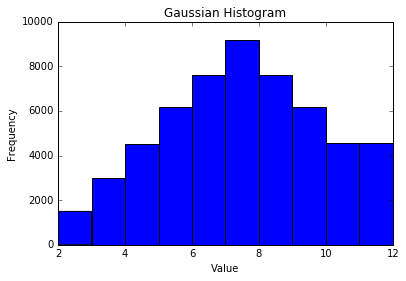

In [179]:
Tenzing = Fighter('Tenzing')
Tenzing.equip('2h sword')
Tenzing.GreatWeaponMaster()
attempts = 100000
dmg = []


for i in range(attempts):
    dmg.append(Tenzing.attack(10))
    

dmg = remove_values_from_list(dmg,0)

number_of_unique = len(set(dmg))
#bins = numpy.linspace(0, max(dmg), number_of_unique+2)

plt.hist(dmg)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()

round(numpy.mean(dmg),2)

8.3300000000000001

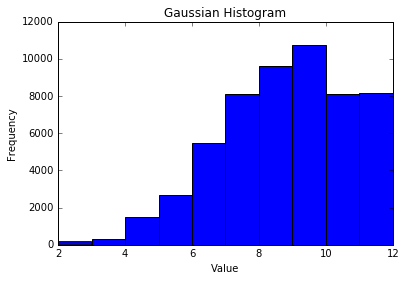

In [180]:
GWFighter = Fighter('GWFighter')
GWFighter.equip('2h sword')
GWFighter.GreatWeaponFighter()

attempts = 100000
dmg = []

for i in range(attempts):
    dmg.append(GWFighter.attack(10))

dmg = remove_values_from_list(dmg,0)
    
number_of_unique = len(set(dmg))
#bins = numpy.linspace(0, max(dmg), number_of_unique+2)

plt.hist(dmg)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()

round(numpy.mean(dmg),2)

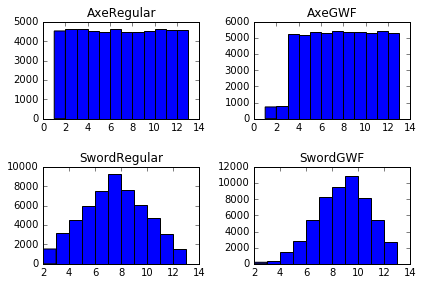

In [229]:
AxeRegular = Fighter("AxeRegular")
AxeRegular.equip('2h axe')
AxeGWF = Fighter("AxeGWF")
AxeGWF.equip('2h axe')
AxeGWF.GreatWeaponFighter()
SwordRegular = Fighter("SwordRegular")
SwordRegular.equip('2h sword')
SwordGWF = Fighter("SwordGWF")
SwordGWF.equip('2h sword')
SwordGWF.GreatWeaponFighter()

Fighters = [AxeRegular,AxeGWF,SwordRegular,SwordGWF]
attempts = 100000
enemyAC = 10
dmgs = []
counter = 1


def plot_histogram(data):
    plt.hist(data,bins=np.arange(min(data), max(data)+2))

plt.figure(1)
    
for afighter in Fighters:
    dmg = []
    for i in range(attempts):
        dmg.append(afighter.attack(enemyAC))
    dmg = remove_values_from_list(dmg,0)
    dmgs.append(dmg)
    

    subplot_specification = 220+counter
    plt.subplot(subplot_specification)
    plot_histogram(dmg)
    plt.title(afighter.name)
    
    
    counter+=1
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)

In [230]:
for dmg in dmgs:
    print (numpy.mean(dmg))

6.49586686174
7.35474452555
7.01099916646
8.32398956975


'Tenzing'